In [ ]:
import sys
!conda install -c numba numba
!conda install -y -c conda-forge librosa

**Example 1:** Display a waveform of the file we are processing and give the user a facility to play the audio.

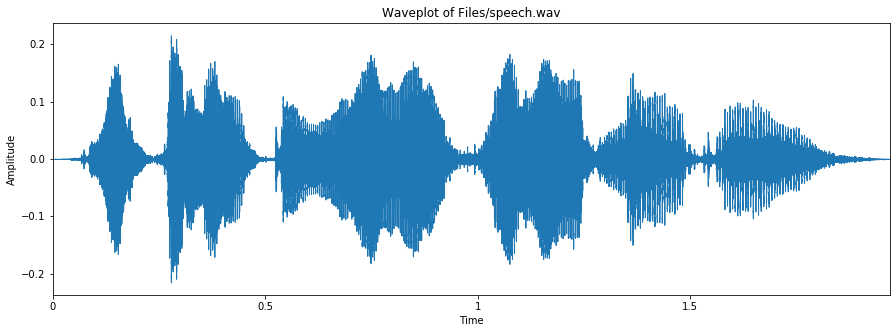

In [5]:
import os
import librosa   
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

filename = 'Files/speech.wav'
y, sr = librosa.load(filename, mono=True)
plt.figure(figsize=(15,5))
plt.title('Waveplot of ' + filename)
plt.xlabel('Time')
plt.ylabel('Amplitude')
librosa.display.waveplot(y, sr=sr)
ipd.Audio(data=y, rate=sr)

**Example 2:** Lets process the audio from the file.  We use the SpeechRecognition library here.  This support several popular service such sa Microsoft Bing Speech, Google Web Speech API, Google Cloud Speech and IBM Speech to Text.  These are online services.  We use Google Web Speech as it can be used in a test mode without having to setup API authentication.

In [ ]:
!pip install SpeechRecognition

In [3]:
import speech_recognition as srec
r = srec.Recognizer()
with srec.AudioFile(filename) as source:
    audio = r.record(source)

# for testing purposes, we're  using the default API key to use another API key, 
# use `r.recognize_google(audio, key="GOOGLE_SPEECH_RECOGNITION_API_KEY")` instead 
# of `r.recognize_google(audio)`
try:
    print("Google Speech Recognition: " + r.recognize_google(audio))
except srec.UnknownValueError:
    print("Google Speech Recognition: could not understand audio")
except srec.RequestError as e:
    print("Google Speech Recognition: service not available {0}".format(e))

Google Speech Recognition: you've been acting really weird lately


**Example 3:** Show how the speech recognition has picked the recognition it has the highest confidence with.

In [4]:
from pprint import pprint
with srec.AudioFile(filename) as source:
    audio = r.record(source)

r.adjust_for_ambient_noise
try:
    pprint(r.recognize_google(audio, show_all=True))
except srec.UnknownValueError:
    print("Google Speech Recognition: could not understand audio")
except srec.RequestError as e:
    print("Google Speech Recognition: service not available {0}".format(e))

{'alternative': [{'confidence': 0.95467669,
                  'transcript': "you've been acting really weird lately"},
                 {'transcript': "you've been acting really weird like"},
                 {'transcript': "you've been acting really weird light"},
                 {'transcript': "you've been acting really weird late"},
                 {'transcript': 'you have been acting really weird lately'}],
 'final': True}
